In [7]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
with zipfile.ZipFile("jena_climate_2009_2016.csv.zip", "r") as zip_ref:
    zip_ref.extractall(r"/home/piah/Documents/AI-Guru/")

--2021-02-18 16:34:54--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.30.62
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.30.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip.3’

jena_climate_2009_2 100%[===================>]  12,94M  3,13MB/s    in 5,1s    

2021-02-18 16:34:59 (2,54 MB/s) - ‘jena_climate_2009_2016.csv.zip.3’ saved [13565642/13565642]



In [16]:
import zipfile
from keras import models, layers

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [17]:
pip install tensorflow

     |████████████████████████████████| 394.4 MB 37 kB/s  eta 0:00:01    |███                             | 36.6 MB 1.8 MB/s eta 0:03:21     |█████████                       | 110.5 MB 2.7 MB/s eta 0:01:44     |█████████████▍                  | 165.0 MB 1.9 MB/s eta 0:01:58     |██████████████                  | 171.8 MB 2.4 MB/s eta 0:01:34     |████████████████▏               | 198.6 MB 2.5 MB/s eta 0:01:19
     |████████████████████████████████| 1.0 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 781 k

In [1]:
import os

fname = "jena_climate_2009_2016.csv"
f = open(fname)
data = f.read()
f.close()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [2]:
import numpy as np

float_data = np.zeros((len(lines), len(header)-1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(",")[1:]]
  float_data[i, :] = values

In [3]:
print(float_data[0])

[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
  3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
  1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]


In [4]:
print(np.min(float_data))

-25.01


In [5]:
print(np.min(float_data, axis=0))
print(np.mean(float_data, axis=0))
print(np.std(float_data, axis=0))
print(np.median(float_data, axis=0))
print(np.max(float_data, axis=0))

[ 9.13600e+02 -2.30100e+01  2.50600e+02 -2.50100e+01  1.29500e+01
  9.50000e-01  7.90000e-01  0.00000e+00  5.00000e-01  8.00000e-01
  1.05945e+03  0.00000e+00  0.00000e+00  0.00000e+00]
[ 989.21250783    9.44856687  283.49118161    4.95401072   76.00704494
   13.57508937    9.53252372    4.04248255    6.02163018    9.63898219
 1216.06988308    2.130309      3.53238071  174.7261635 ]
[ 8.35944437  8.42367506  8.5048102   6.73040306 16.47710594  7.73947215
  4.18389036  4.89726435  2.65597021  4.23512542 39.97701754  1.54182803
  2.34047899 86.67586212]
[ 989.57    9.41  283.46    5.21   79.3    11.82    8.86    2.19    5.59
    8.96 1213.8     1.76    2.96  198.1 ]
[1015.35   37.28  311.34   23.11  100.     63.77   28.32   46.01   18.13
   28.82 1393.54   14.63   23.5   360.  ]


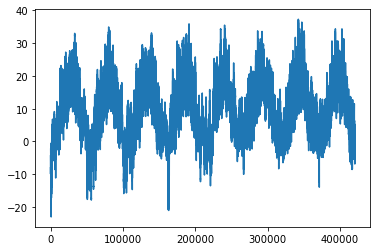

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(float_data[:,1])

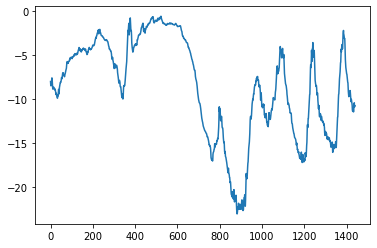

In [7]:
plt.plot(float_data[:1440,1])

In [8]:
1440*10/(60*24)

10.0

In [9]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [10]:
def generator(
    data, # Subset of float-data
    lookback, # Past
    delay,  # Future
    min_index, # Start index
    max_index, # End index
    shuffle=False, # Shuffles the data.
    batch_size=128, # How many samples.
    step=6 # sampling rate
    ):
    
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while True:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size
            )
        else:    
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
           
        samples = np.zeros((
            len(rows), 
            lookback // step,
            data.shape[-1]
        ))
        targets = np.zeros((len(rows),))  
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
            
        yield samples, targets

        
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step,
    batch_size=batch_size
)

val_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    shuffle=False,
    step=step,
    batch_size=batch_size
)

test_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=300001,
    max_index=None,
    shuffle=False,
    step=step,
    batch_size=batch_size
)

val_steps = (300_000 - 200_001 - lookback) // batch_size
test_steps = (len(float_data) - 300_001 - lookback) // batch_size

In [11]:
x, y = next(train_gen)
print(x.shape, "->", y.shape)
print(y)

(128, 240, 14) -> (128,)
[-4.86568698e-01 -3.19384269e-01  2.74798227e-01  2.04761507e-01
 -4.47031840e-01 -1.78111839e+00  1.17510897e+00  1.26817415e-01
 -2.68115193e-02  1.55918130e+00 -9.47455501e-01  1.23428541e-01
 -6.11957019e-01 -3.00180652e-01 -2.22167196e+00  1.31518241e+00
  6.44185444e-01  2.18951178e+00 -6.44716130e-01 -6.96678858e-01
 -6.89901111e-01  1.48236684e+00  1.06440576e+00  1.70829174e+00
  4.44241904e-01 -9.55362872e-01 -1.55588714e-01  1.75573597e+00
  1.76477296e+00  5.73019099e-01  4.58927023e-01  1.27338630e+00
 -1.97384821e-01 -3.51013756e-01 -6.52187529e-02 -5.10290813e-01
 -9.84733110e-01  4.01316173e-01  5.89963467e-01  1.15138685e+00
 -5.12550062e-01  8.20684073e-03 -4.06365357e-01 -7.53160084e-01
 -1.35863882e+00  1.03164665e+00 -2.90707683e-02 -5.21587058e-01
  7.70703390e-01 -4.71883579e-01 -6.07438521e-01 -9.98288604e-01
  1.85557890e-01  1.62965400e-01 -7.98345064e-01 -6.09697770e-01
  2.42039116e-01  2.15901192e+00 -2.36400464e+00  1.15521170e-01


In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(240, 14)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1, activation="linear"))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="mae"
)

model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps
)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3360)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                107552    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


/home/piah/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


500/500 [==============================] - 12s 24ms/step - loss: 2.3487 - val_loss: 0.9051
Epoch 2/20
500/500 [==============================] - 12s 24ms/step - loss: 0.7109 - val_loss: 0.3760
Epoch 3/20
500/500 [==============================] - 12s 25ms/step - loss: 0.3210 - val_loss: 0.3062
Epoch 4/20
500/500 [==============================] - 11s 23ms/step - loss: 0.2736 - val_loss: 0.3355
Epoch 5/20
500/500 [==============================] - 11s 23ms/step - loss: 0.2568 - val_loss: 0.3185
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2473 - val_loss: 0.3111
Epoch 7/20
500/500 [==============================] - 13s 25ms/step - loss: 0.2420 - val_loss: 0.3536
Epoch 8/20
 40/500 [=>............................] - ETA: 3s - loss: 0.2420

In [ ]:
model.history.history